# **Final Project Task 2 - Census EDA**

Requirements

- Analyze hours-per-week Target Distribution **1p**
    - Provide visualizations like histograms or density plots for hours-per-week to assess its distribution, outliers, and skewness.

- Provide a summary of the dataset using descriptive statistics, such as mean, median, and standard deviation. **1p**

- Check for missing values and report the number and percentage of missing data for each column. **1p**

- Identify outliers in at least one numerical column using boxplots. **1p**

- Write a summary report of your findings from the EDA, highlighting key patterns or trends, unexpected insights or anomalies, and areas requiring further investigation. **1p**


- Plot histograms for at least three numerical columns and discuss their distributions, such as skewness and modality. - Optional

- Generate bar plots for at least three categorical columns and discuss the frequency distributions. - Optional

- Create a correlation matrix for target hours-per-week and the rest of numerical variables and discuss the strongest and weakest correlations with the target. - Optional

- Explore relationships between at least one numerical variable and hours-per-week target using scatter plots and identify any visible trends. Choose the variable that is/are most correlated with hours-per-week. - Optional

- Analyze the relationship between hours-per-week and all categorical variable using boxplots or violin plots. - Optional

- At the end, do the same analysis for the preprocessed dataset (just change the input data in the EDA), and write a report. - Optional

- Others? - Optional


Deliverable:

- Notebook code with no errors.
- Include all visuals from the requirements in the notebook: graphs, plots, histograms, heatmap etc
- Be sure to discuss the findings and add a summary report

## Setup + Incarcarea datelor

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

df = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)

df.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**Observati**: Datele au fost încărcate din repository-ul oficial UCI pentru a asigura reproductibilitatea analizei. Coloanele au fost definite manual deoarece fișierul original nu conține un header. Valorile lipsă marcate cu ? au fost tratate ca NaN pentru a facilita analiza ulterioară.

## Analiza distribuției targetului hours-per-week

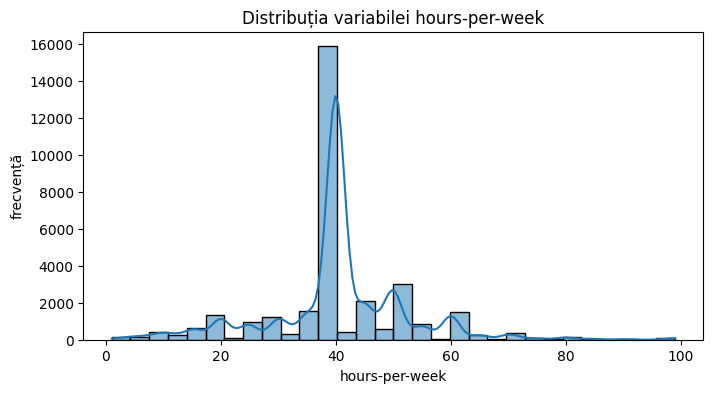

Skewness: 0.228
count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64


In [2]:
target = "hours-per-week"

plt.figure(figsize=(8,4))
sns.histplot(df[target].dropna(), bins=30, kde=True)
plt.title("Distribuția variabilei hours-per-week")
plt.xlabel("hours-per-week")
plt.ylabel("frecvență")
plt.show()

print("Skewness:", round(df[target].dropna().skew(), 3))
print(df[target].describe())


**Observati**: Distribuția variabilei hours-per-week este ușor asimetrică spre dreapta (skewness = 0.228). Media este de aproximativ 40.44 ore, iar mediana este 40 ore, confirmând concentrarea majorității observațiilor în jurul programului standard de lucru. Valorile extreme ajung până la 99 de ore pe săptămână, indicând existența unor outlieri.

## Summary descriptive statistics (mean, median, std)

In [3]:
num_df = df.select_dtypes(include=[np.number])

desc = num_df.describe().T
desc["median"] = num_df.median(numeric_only=True)
desc = desc[["count","mean","median","std","min","25%","50%","75%","max"]]

desc

,count,mean,median,std,min,25%,50%,75%,max
age,32561.0,38.581647,37.0,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,178356.0,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,10.0,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,0.0,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,0.0,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,40.0,12.347429,1.0,40.0,40.0,45.0,99.0


**Observati**: Variabilele numerice prezintă niveluri diferite de dispersie. age și hours-per-week sunt relativ concentrate în jurul valorilor centrale, în timp ce fnlwgt, capital-gain și capital-loss prezintă o variabilitate foarte mare și distribuții puternic asimetrice. Pentru capital-gain și capital-loss, mediana este zero, indicând că majoritatea observațiilor nu înregistrează câștiguri sau pierderi de capital.

## Analiza valorilor lipsa

In [4]:
missing_count = df.isna().sum()
missing_pct = (missing_count / len(df) * 100).round(2)

missing_table = pd.DataFrame({
    "missing_count": missing_count,
    "missing_pct": missing_pct
}).sort_values("missing_count", ascending=False)

missing_table

,missing_count,missing_pct
age,0,0.0
workclass,0,0.0
fnlwgt,0,0.0
education,0,0.0
education-num,0,0.0
marital-status,0,0.0
occupation,0,0.0
relationship,0,0.0
race,0,0.0
sex,0,0.0


**Observati**: Nu au fost identificate valori lipsă în dataset, toate coloanele având un procent de 0% valori NaN. Acest lucru indică faptul că datele sunt complete și nu necesită tratamente suplimentare pentru valori lipsă în etapa de analiză exploratorie.

## Identificarea outlierilor cu boxplot

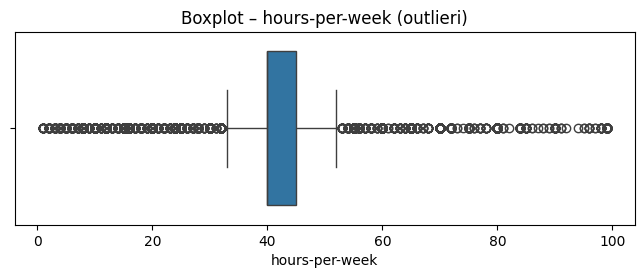

In [5]:
plt.figure(figsize=(8,2.5))
sns.boxplot(x=df[target])
plt.title("Boxplot – hours-per-week (outlieri)")
plt.xlabel("hours-per-week")
plt.show()

**Observati**: Boxplot-ul indică faptul că majoritatea observațiilor sunt concentrate în jurul valorii de 40 de ore pe săptămână, cu un interval intercuartilic relativ îngust. Se observă numeroși outlieri atât sub, cât și peste limitele cutiei, în special valori ridicate, care indică persoane ce lucrează un număr foarte mare de ore săptămânal. Acești outlieri pot influența analizele statistice și modelele predictive și ar trebui analizați separat.

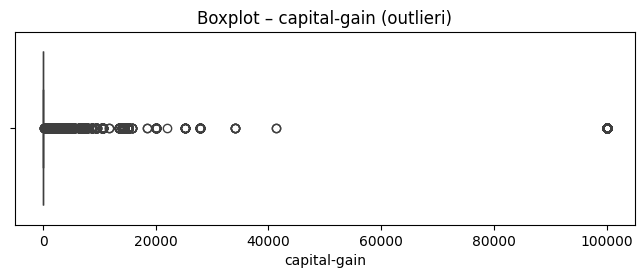

In [6]:
plt.figure(figsize=(8,2.5))
sns.boxplot(x=df["capital-gain"])
plt.title("Boxplot – capital-gain (outlieri)")
plt.show()

**Observati**: Boxplot-ul arată o distribuție extrem de asimetrică, cu majoritatea observațiilor concentrate în jurul valorii zero. Se observă un număr mare de outlieri pozitivi, inclusiv valori foarte ridicate, ceea ce indică faptul că doar o mică parte din populație înregistrează câștiguri de capital semnificative. Această distribuție poate influența puternic media și necesită o tratare atentă în etapele ulterioare de modelare.

## Raport de sinteză EDA

## Histograme pentru 3 variabile numerice

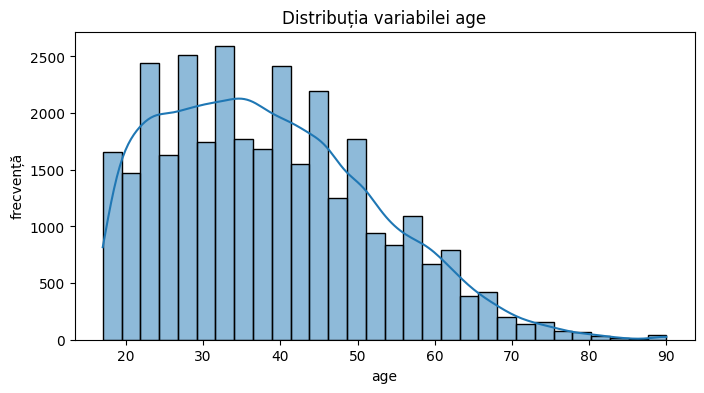

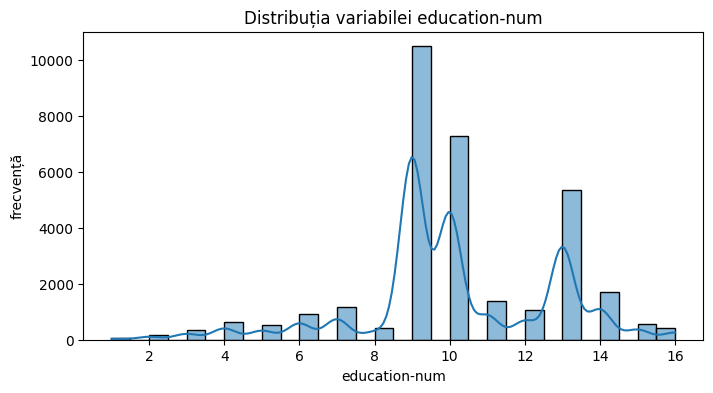

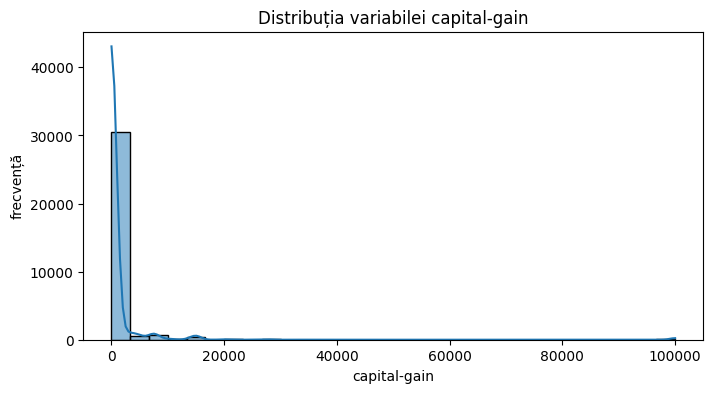

In [7]:
num_cols = ["age", "education-num", "capital-gain"]

for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col].dropna(), bins=30, kde=True)
    plt.title(f"Distribuția variabilei {col}")
    plt.xlabel(col)
    plt.ylabel("frecvență")
    plt.show()

## Bar plots pentru 3 variabile categoriale

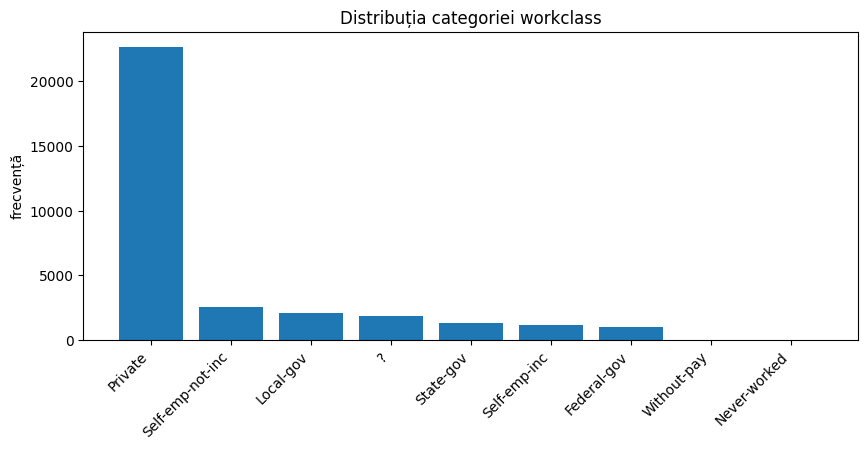

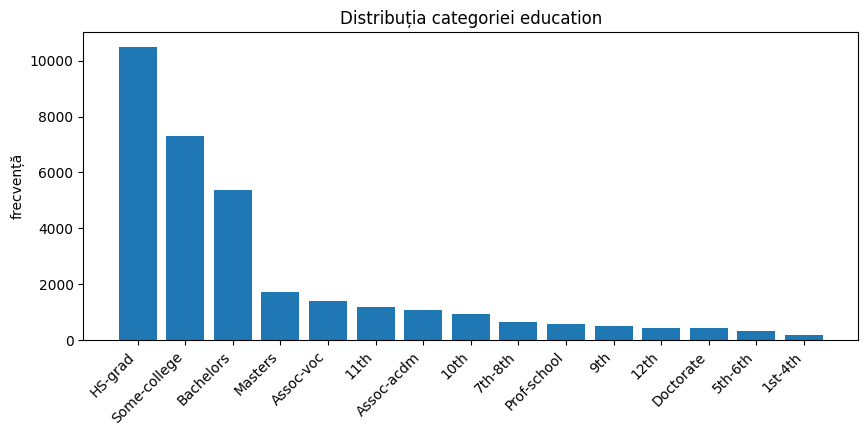

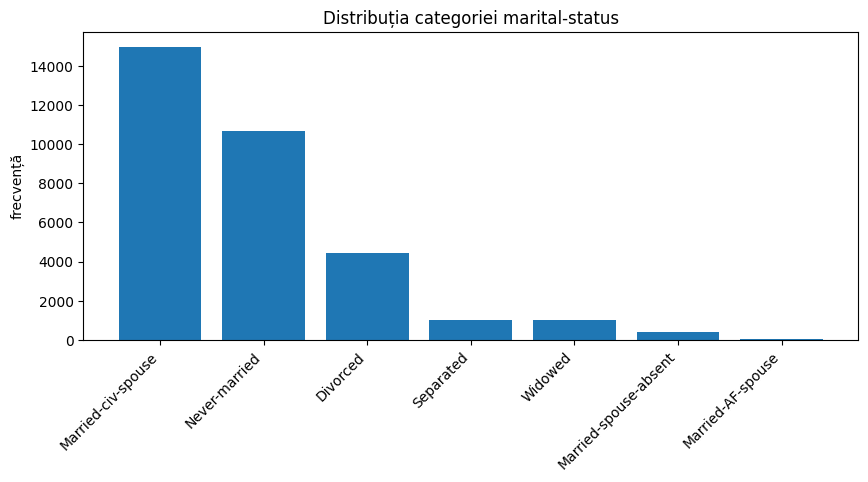

In [8]:
cat_cols = ["workclass", "education", "marital-status"]

for col in cat_cols:
    vc = df[col].value_counts(dropna=False).head(15)
    plt.figure(figsize=(10,4))
    plt.bar(vc.index.astype(str), vc.values)
    plt.title(f"Distribuția categoriei {col}")
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("frecvență")
    plt.show()

- **Interpretarea distribuției variabilei age**

Distribuția variabilei age este ușor asimetrică spre dreapta, cu o concentrare mai mare a observațiilor între aproximativ 25 și 50 de ani. Frecvența scade progresiv pentru vârstele mai înaintate, indicând o populație predominant activă din punct de vedere profesional.

- **Interpretarea distribuției variabilei education-num**

Variabila education-num prezintă o distribuție discretă, cu mai multe vârfuri corespunzătoare nivelurilor educaționale cele mai frecvente. Se observă o concentrare a valorilor în jurul nivelurilor medii de educație, în timp ce valorile extreme apar mai rar.

- **Interpretarea distribuției variabilei capital-gain**

Distribuția variabilei capital-gain este extrem de asimetrică, cu un vârf pronunțat la valoarea zero. Majoritatea observațiilor nu înregistrează câștiguri de capital, iar un număr foarte mic de cazuri prezintă valori foarte mari, ceea ce generează o coadă lungă spre dreapta.

## Matrice de corelație

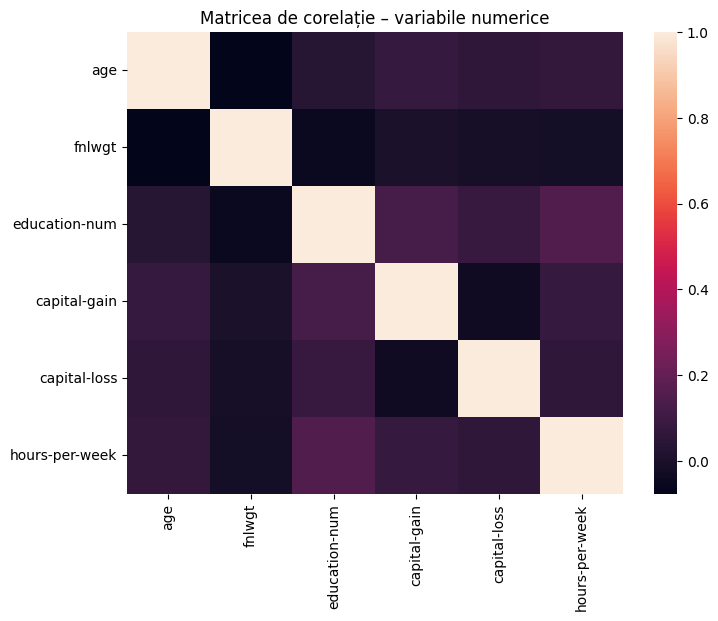

hours-per-week    1.000000
education-num     0.148123
capital-gain      0.078409
age               0.068756
capital-loss      0.054256
fnlwgt           -0.018768
Name: hours-per-week, dtype: float64

In [9]:
corr = num_df.corr(numeric_only=True)

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=False)
plt.title("Matricea de corelație – variabile numerice")
plt.show()

corr["hours-per-week"].sort_values(ascending=False)


**Observati:** Matricea de corelație indică relații slabe între variabilele numerice și variabila țintă hours-per-week. Cea mai mare corelație pozitivă este observată cu education-num (≈ 0.15), sugerând că un nivel educațional mai ridicat este asociat cu un număr ușor mai mare de ore lucrate pe săptămână. Corelațiile cu capital-gain, age și capital-loss sunt pozitive, dar foarte reduse, în timp ce fnlwgt prezintă o corelație negativă nesemnificativă. Per ansamblu, nu se observă relații liniare puternice, ceea ce sugerează că modelele non-liniare ar putea fi mai potrivite.

## Scatter plot - relația cu cea mai corelată variabilă 

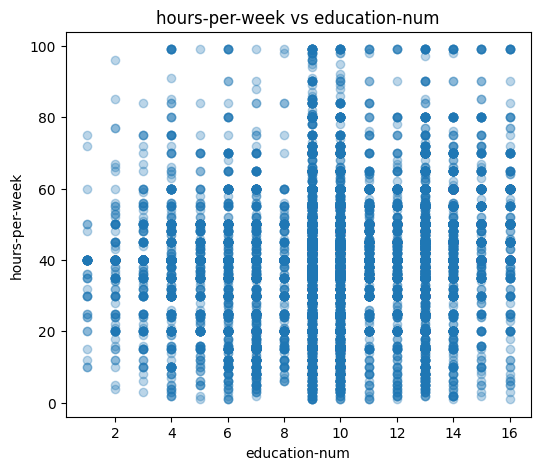

In [10]:
best_feature = corr["hours-per-week"].sort_values(ascending=False).index[1]

plt.figure(figsize=(6,5))
plt.scatter(df[best_feature], df[target], alpha=0.3)
plt.title(f"hours-per-week vs {best_feature}")
plt.xlabel(best_feature)
plt.ylabel("hours-per-week")
plt.show()

**Observatie**: Graficul indică o relație pozitivă slabă între nivelul educațional (education-num) și numărul de ore lucrate pe săptămână. Deși valorile sunt foarte dispersate, se observă o ușoară tendință de creștere a orelor lucrate odată cu creșterea nivelului de educație. Lipsa unui pattern clar confirmă corelația redusă identificată anterior.

## Relația target - variabile categoriale

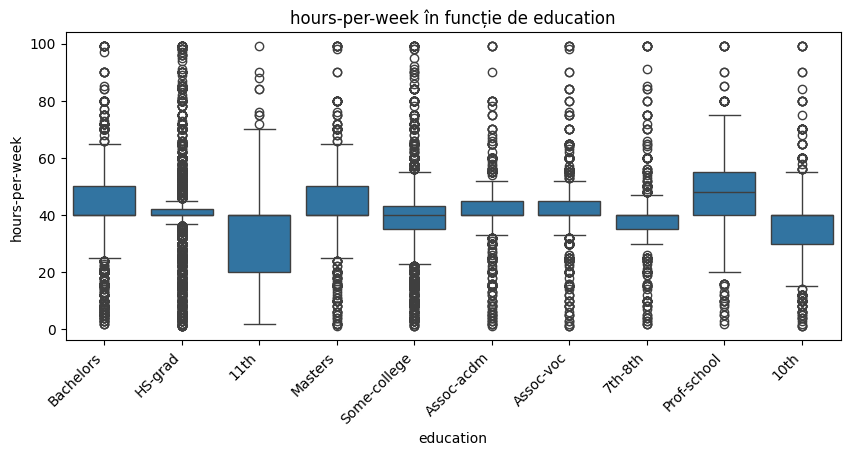

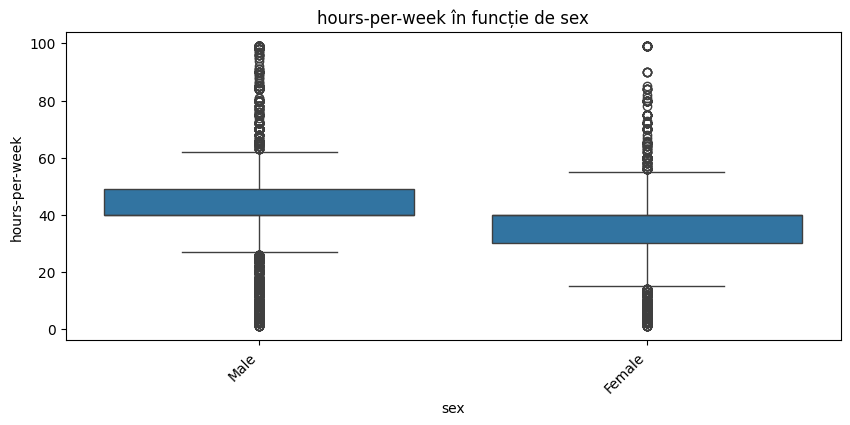

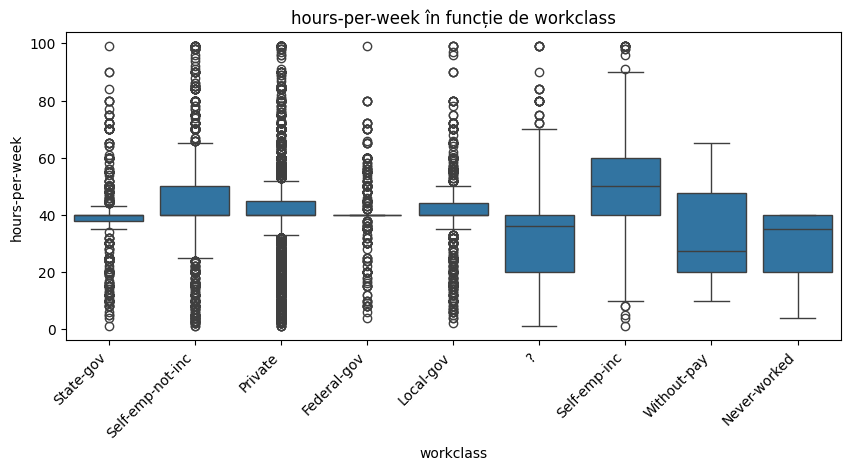

In [11]:
for col in ["education", "sex", "workclass"]:
    top = df[col].value_counts().head(10).index
    sub = df[df[col].isin(top)]

    plt.figure(figsize=(10,4))
    sns.boxplot(data=sub, x=col, y=target)
    plt.title(f"hours-per-week în funcție de {col}")
    plt.xticks(rotation=45, ha="right")
    plt.show()

- **Education**
Se observă diferențe între nivelurile educaționale, cu valori mediane mai ridicate ale orelor lucrate pentru niveluri educaționale superioare (de exemplu, Prof-school și Masters). Totuși, distribuțiile se suprapun considerabil, indicând o variabilitate mare în interiorul fiecărei categorii.

- **Sex**
Bărbații prezintă o mediană mai mare a numărului de ore lucrate pe săptămână comparativ cu femeile. De asemenea, pentru bărbați apar mai frecvent valori extreme ridicate, sugerând o variabilitate mai mare a programului de lucru.

- **Workclass**
Numărul de ore lucrate diferă între tipurile de ocupație, cu valori mediane mai ridicate pentru categoriile Self-emp-inc și Private. Categoria cu valori lipsă („?”) prezintă o dispersie mare, ceea ce sugerează heterogenitate ridicată în acest grup.

## EDA

In [13]:
target = "hours-per-week"

X = df_pre.drop(columns=[target])
y = df_pre[target]

X.shape, y.shape

((32353, 15), (32353,))

In [14]:
# Separarea variabilelor numerice și categoriale

num_cols = X.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X.select_dtypes(include=["object", "category"]).columns

num_cols, cat_cols

(Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
        'capital-gain-log'],
       dtype='object'),
 Index(['workclass', 'education', 'marital-status', 'occupation',
        'relationship', 'race', 'sex', 'native-country', 'income'],
       dtype='object'))

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Regresie Liniara

In [ ]:

from sklearn.linear_model import LinearRegression

lin_reg = Pipeline(
    steps=[
        ("preprocessing", preprocessor),
        ("model", LinearRegression())
    ]
)

In [18]:
lin_reg.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessing', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers c

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred_lr = lin_reg.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R2:", r2_score(y_test, y_pred_lr))

MAE: 7.459999496072625
RMSE: 10.43185905681254
R2: 0.20422671261023984


**Observati**: Modelul de regresie liniară a fost utilizat ca model de bază (baseline) pentru a prezice variabila hours-per-week. Rezultatele obținute indică o performanță moderată, cu o eroare medie absolută (MAE) de aproximativ 7.46 ore, ceea ce înseamnă că, în medie, predicțiile modelului diferă de valorile reale cu circa 7–8 ore pe săptămână.

Valoarea RMSE ≈ 10.43 ore sugerează existența unor erori mai mari pentru anumite observații, metrică fiind sensibilă la outlieri. Scorul R² ≈ 0.20 indică faptul că modelul explică aproximativ 20% din variația variabilei hours-per-week, ceea ce sugerează că relațiile dintre variabile nu sunt predominant liniare.

## Decision Tree Regressor

In [20]:
from sklearn.tree import DecisionTreeRegressor

tree = Pipeline(
    steps=[
        ("preprocessing", preprocessor),
        ("model", DecisionTreeRegressor(
            max_depth=6,
            random_state=42
        ))
    ]
)

In [21]:
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)

print("Decision Tree MAE:", mean_absolute_error(y_test, y_pred_tree))
print("Decision Tree RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_tree)))
print("Decision Tree R2:", r2_score(y_test, y_pred_tree))

Decision Tree MAE: 7.16107597714688
Decision Tree RMSE: 10.237372285985012
Decision Tree R2: 0.23362217708660393


In [ ]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree"],
    "MAE": [
        mean_absolute_error(y_test, y_pred_lr),
        mean_absolute_error(y_test, y_pred_tree)
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred_lr)),
        np.sqrt(mean_squared_error(y_test, y_pred_tree))
    ],
    "R2": [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_tree)
    ]
})

results

**Observatie**: Modelul  a fost utilizat pentru a surprinde relațiile non-liniare dintre variabilele explicative și variabila țintă hours-per-week. Prin limitarea adâncimii arborelui la max_depth = 6, s-a urmărit obținerea unui echilibru între capacitatea de învățare și evitarea supraînvățării (overfitting).

Rezultatele obținute indică o eroare medie absolută (MAE) de aproximativ 7.16 ore, ceea ce sugerează că, în medie, predicțiile modelului diferă de valorile reale cu puțin peste 7 ore pe săptămână. Valoarea RMSE ≈ 10.24 ore indică existența unor erori mai mari pentru anumite observații, însă este comparabilă cu eroarea medie, sugerând o stabilitate rezonabilă a modelului.

Scorul R² ≈ 0.23 arată că modelul explică aproximativ 23% din variația variabilei hours-per-week. Deși acest procent nu este foarte ridicat, el indică o capacitate mai bună de captare a structurii datelor față de un model pur liniar, confirmând prezența unor relații non-liniare în dataset.

## Compararea celor Doua Modele

In [22]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree"],
    "MAE": [
        mean_absolute_error(y_test, y_pred_lr),
        mean_absolute_error(y_test, y_pred_tree)
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred_lr)),
        np.sqrt(mean_squared_error(y_test, y_pred_tree))
    ],
    "R2": [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_tree)
    ]
})

results

,Model,MAE,RMSE,R2
0,Linear Regression,7.459999,10.431859,0.204227
1,Decision Tree,7.161076,10.237372,0.233622


**Observati**: Compararea performanței celor două modele indică faptul că Decision Tree Regressor obține rezultate ușor mai bune decât Linear Regression pe toate metricile evaluate. Modelul de tip Decision Tree prezintă o eroare medie absolută (MAE) mai mică (≈ 7.16 ore față de ≈ 7.46 ore), precum și o valoare RMSE mai redusă, sugerând predicții marginal mai precise.

Scorul R² este mai ridicat pentru modelul Decision Tree (≈ 0.23 comparativ cu ≈ 0.20), ceea ce indică o capacitate mai bună de a explica variația variabilei hours-per-week. Diferențele dintre modele nu sunt foarte mari, însă rezultatele sugerează că relațiile dintre variabile sunt parțial non-liniare, fiind captate mai eficient de arborele de decizie.

Decision Tree Regressor oferă performanțe superioare și este modelul preferat pentru acest set de date, în timp ce regresia liniară rămâne un baseline util pentru comparație.